## Data Preprocessing

- 영상 데이터 전처리

In [1]:
# 이미지 크기조정(Image Resize)
# 히스토그램 활성화(Histogram Equalization)
# 데이터 증강(Data Augmentation)
# 노이즈 제거(Noise Reduction)
# 이미지 정규화(Image Normalization)

# 이외에도 Contour Detection, Edge Detection, Blurring 기법 존재

In [2]:
import seaborn as sns
import pandas as pd
# !pip install missingno
import missingno as msno

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
tit = sns.load_dataset('titanic')
df = pd.DataFrame(tit)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: >

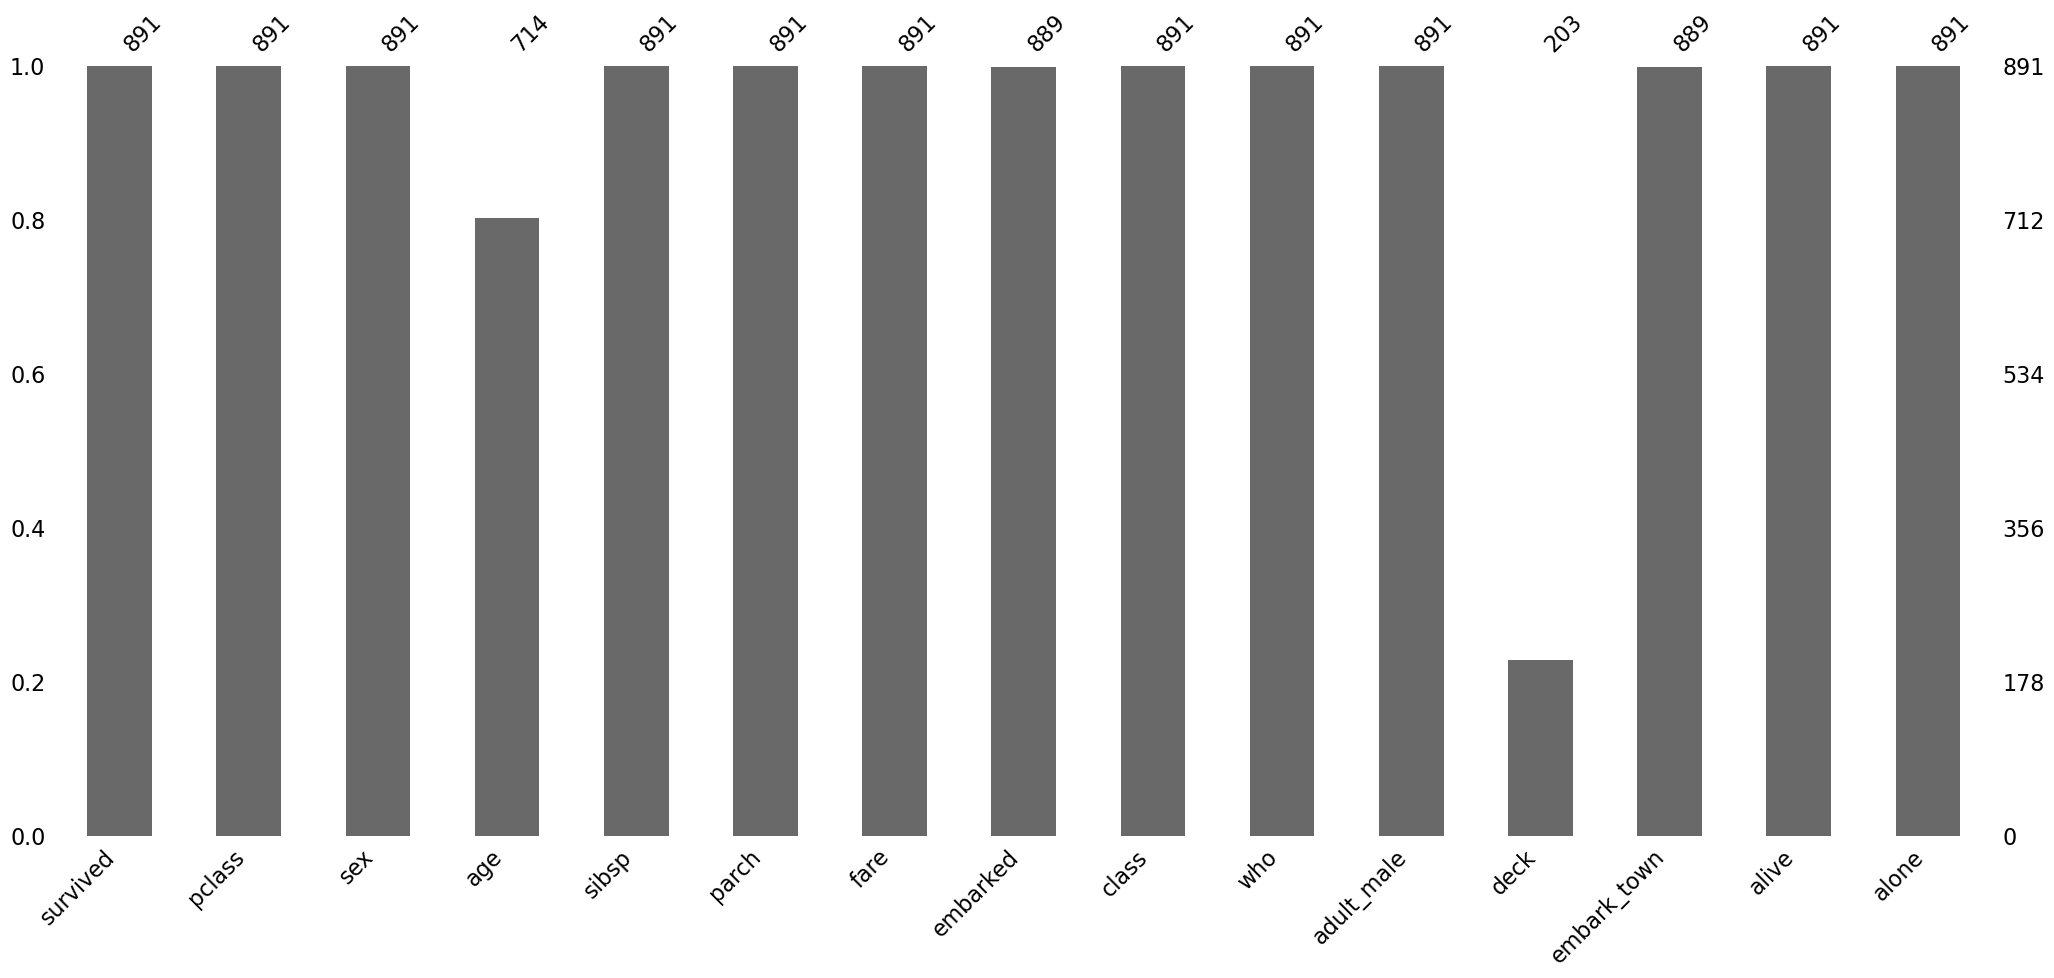

In [ ]:
# missingno : 결측치 시각화
msno.bar(df)

### 환경구성

#### 설치 라이브러리
!pip install opencv-python

In [ ]:
import os
import matplotlib.pyplot as plt

# # 설치되어 있을 경우 주석처리 혹은 삭제
# !pip install opencv-python  
import cv2

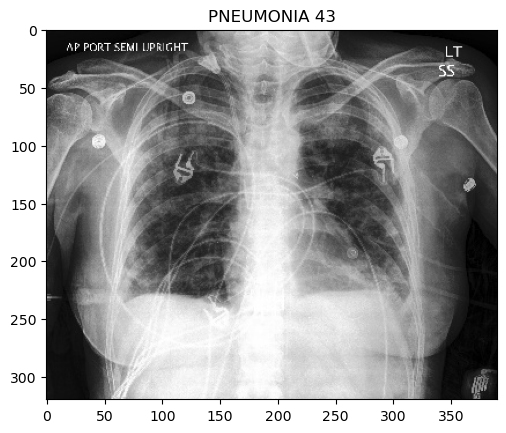

In [ ]:
# data 경로 설정
data_dir = '../z20_data/datas/Pneumonia/Positive/'
categories = ['train','test','val'] # 전처리될 데이터셋을 훈련용, 테스트용, 검증용으로 구분

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir, img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f'PNEUMONIA 43')
plt.show()

Image Resize

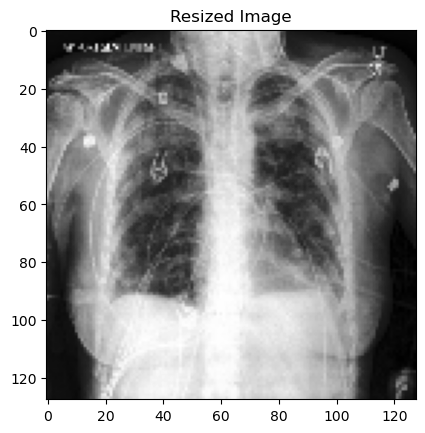

In [ ]:
def resize_image(img, size=(128,128)):
    return cv2.resize(img,size)

resized_img = resize_image(img)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized Image')
plt.show()

Histogram Equalization
- image level 평활화

In [ ]:
# 새로운 함수 어떻게 사용하는지 모를 때
# ?cv2.equalizeHist

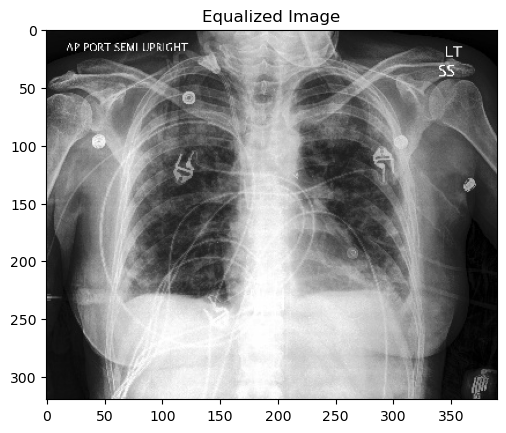

In [ ]:
def he_img(img):
    return cv2.equalizeHist(img)

equalized_img = he_img(img)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

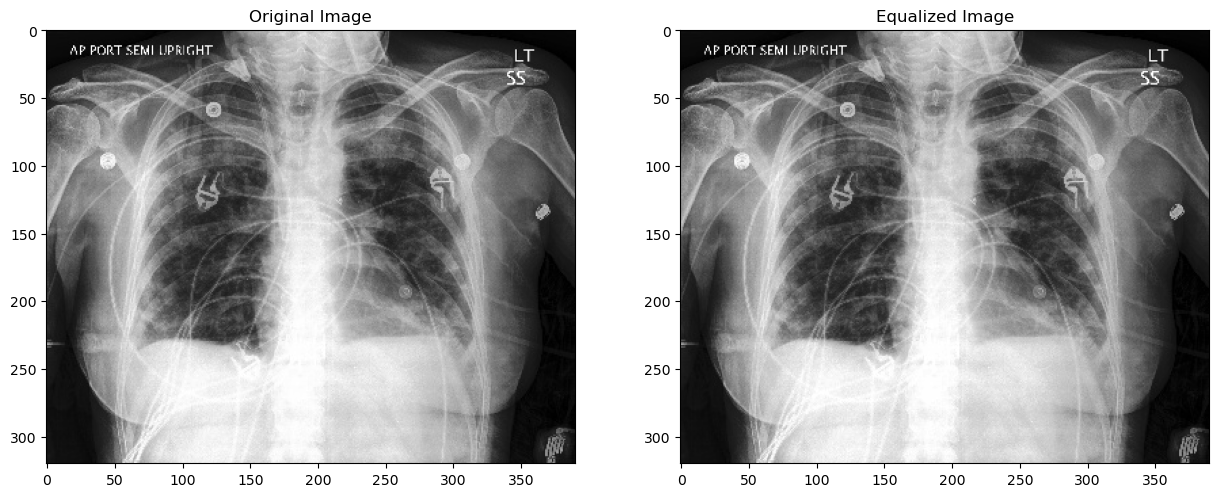

In [ ]:
equalized_img = he_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

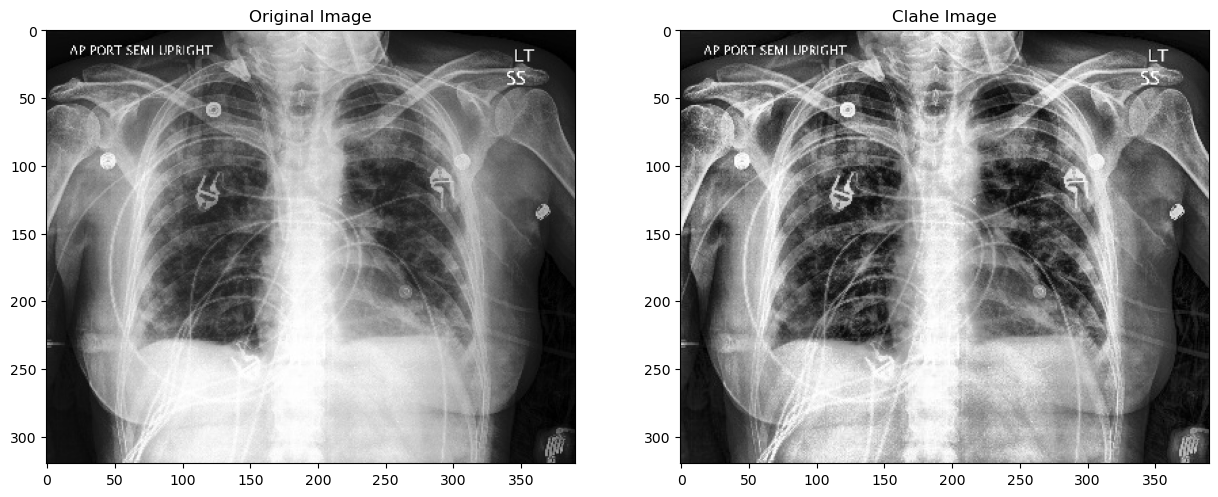

In [ ]:
# Histogram Equalization CLAHE(Contrast Limited Adapted Histogram Equalization)
def clahe_img(img):
    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img
    

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')


plt.subplot(1, 2, 2)
plt.imshow(clahe_img(img), cmap='gray')
plt.title('Clahe Image')
plt.show()

Data Augmentation
- 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보
- 데이터의 표본(n수)이 적을 때 주로 사용

In [ ]:

# from tensorflow.keras.preprocessing.image import ImageDataGenerator

Noise Reduction

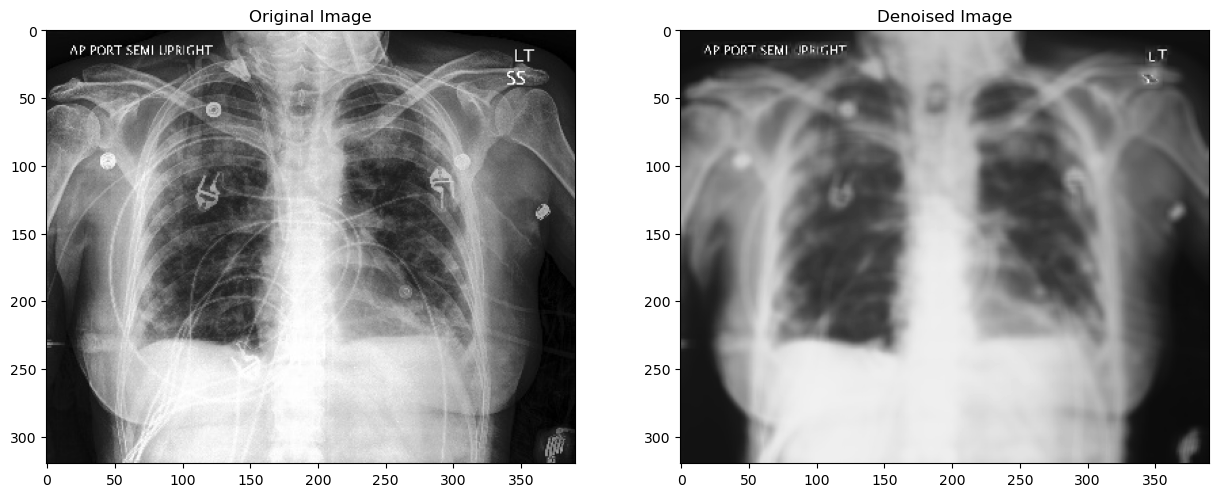

In [ ]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img, None, 30, 7, 210)

denoised_img = denoise_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()

In [ ]:
# ?cv2.fastNlMeansDenoising

Image Normaliztion
- 데이터 정규화 처리
- 연산 효율 높이고 정규성을 생성

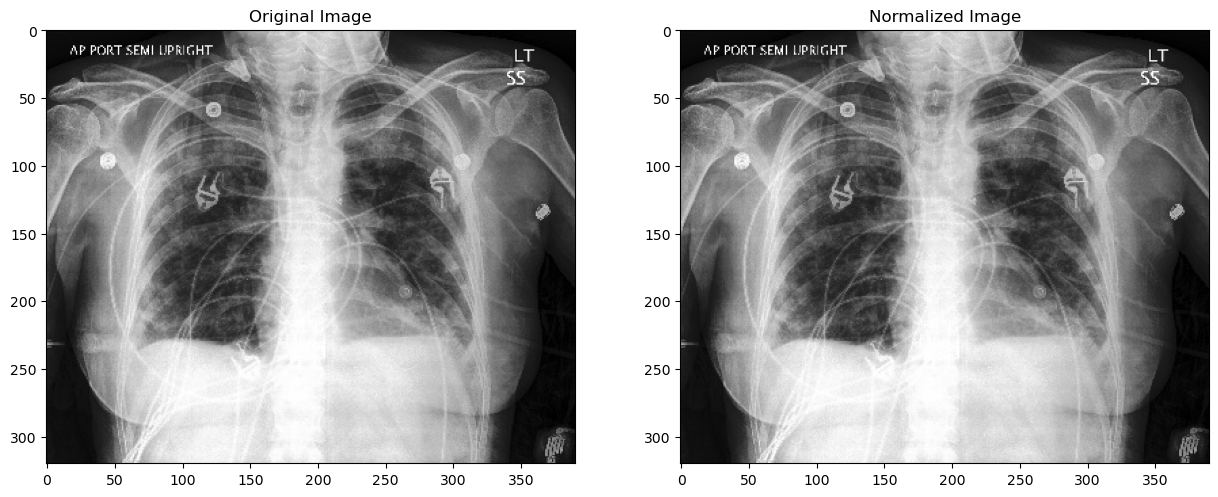

In [ ]:
def normalize_img(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

normalized_img = normalize_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

Edge Detection
- 영상에선 선을 뽑아내는 것을 의미함
- 윤곽만으로도 진단할 수 있는 영상 이미지일 때 사용할 수 있다

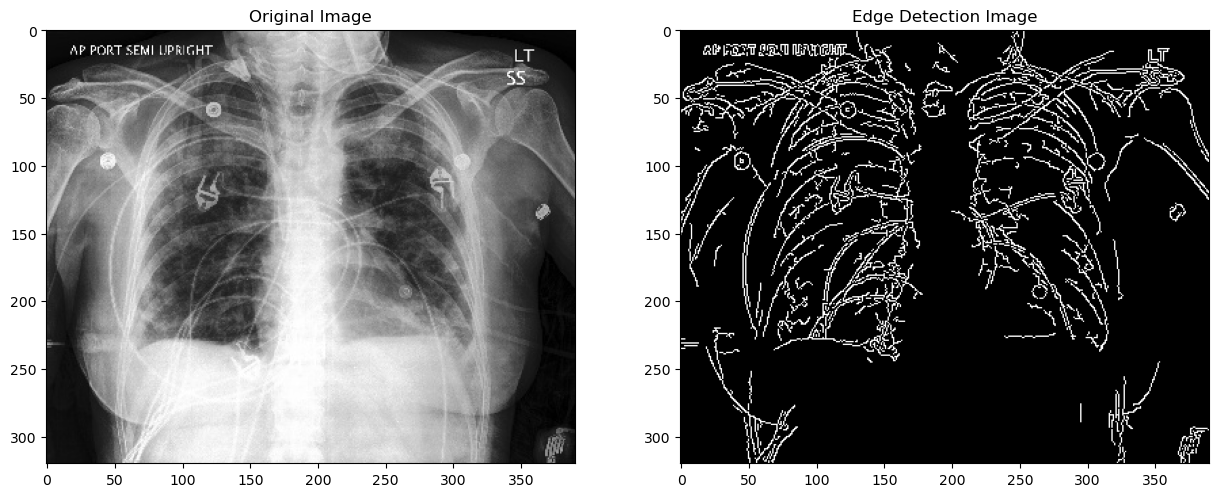

In [ ]:
def detect_edge(img):
    return cv2.Canny(img, 100, 200)  # 값을 조절해주면 선을 그리는 범위가 달라짐

detected_edge_img = detect_edge(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(detected_edge_img, cmap='gray')
plt.title('Edge Detection Image')
plt.show()

Blurring
- Gaussian : 일정한, 고르게 -> GaussianBlur : 고르게 노이즈를 발생시켜 블러처리
- Gaussian 분포는 정규분포라고도 할 수 있다.

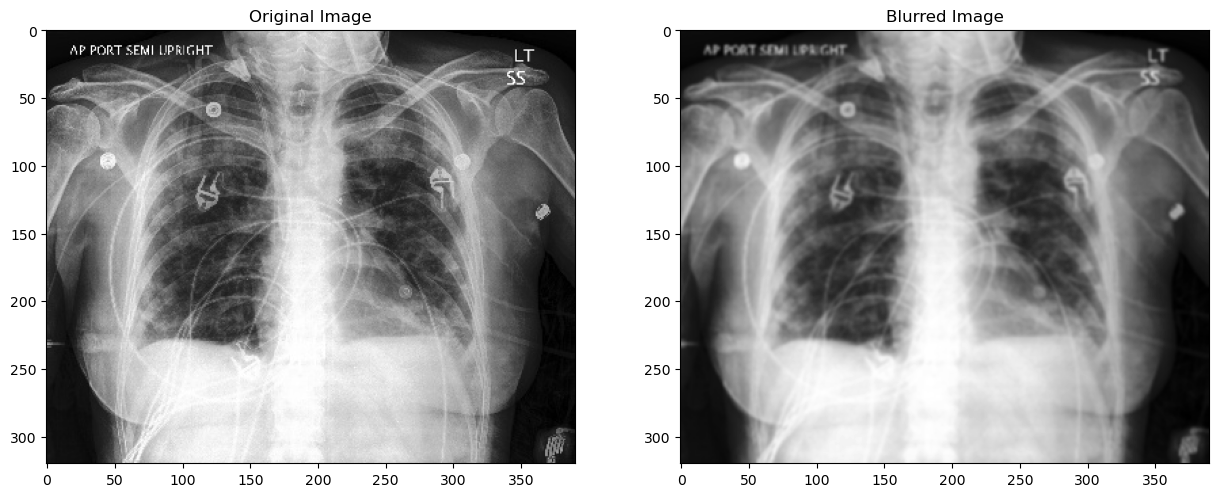

In [ ]:
def blur_img(img):
    return cv2.GaussianBlur(img, (5,5), 0)

blurred_img = blur_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blurred_img, cmap='gray')
plt.title('Blurred Image')
plt.show()

Contour Detection

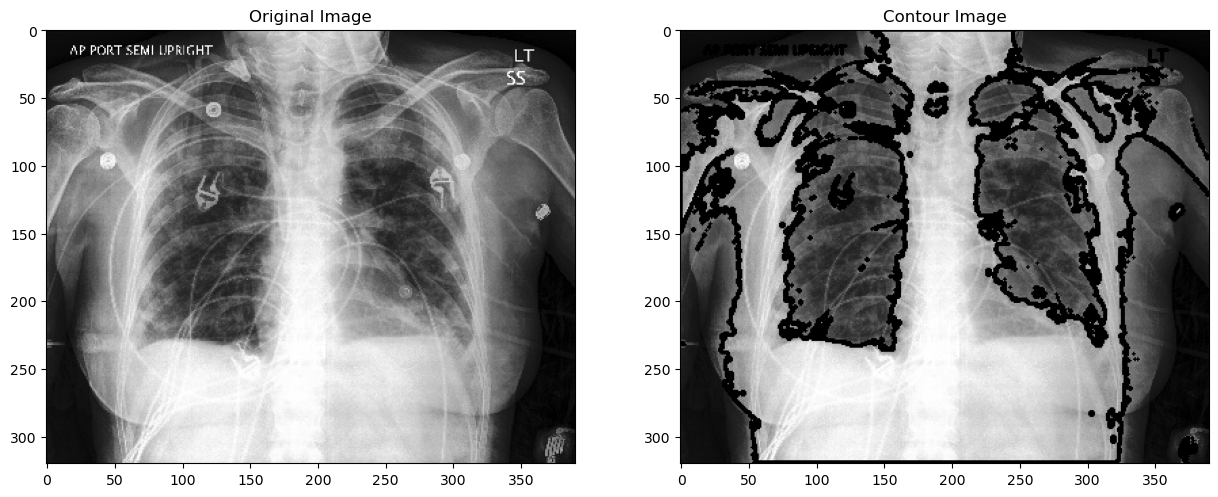

In [ ]:
def find_contour(img):
    ret, thresh = cv2.threshold(img, 127, 255, 0)
    contours, hiearchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(img)
contour_img = cv2.drawContours(img.copy(), contours, -1, (0,255,0), 2)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contour Image')
plt.show()

Data Preparing

In [ ]:
import numpy as np

def load_data(data_dir):
    images = []   # input
    # labels = []   # target
    for img_path in os.listdir(data_dir):
        img  = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_img(img)
        img = normalize_img(img)
        images.append(img)
        
    prepared_datas = np.array(images)
    return prepared_datas

# 전처리 완료 
        

In [ ]:
# 내가 선언한 모든 식별자들을 볼 수 있음
%whos
# %rest : 선언한 모든 식별자 삭제

Variable            Type         Data/Info
------------------------------------------
blur_img            function     <function blur_img at 0x000001AD24A95940>
blurred_img         ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
categories          list         n=3
cl_img              ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
clahe               CLAHE        < cv2.CLAHE 000001AD1AB21930>
clahe_img           function     <function clahe_img at 0x000001AD263FF2E0>
contour_img         ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
contours            tuple        n=615
cv2                 module       <module 'cv2' from 'c:\\U<...>kages\\cv2\\__init__.py'>
data_dir            str          ./datas/Pneumonia/Positive/
denoise_img         function     <function denoise_img at 0x000001AD263FDC60>
denoised_img        ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
detect_edge 

In [ ]:
# 내가 작업하고 있는 폴더 위치
%pwd

'c:\\workspace\\medical1\\p0604'